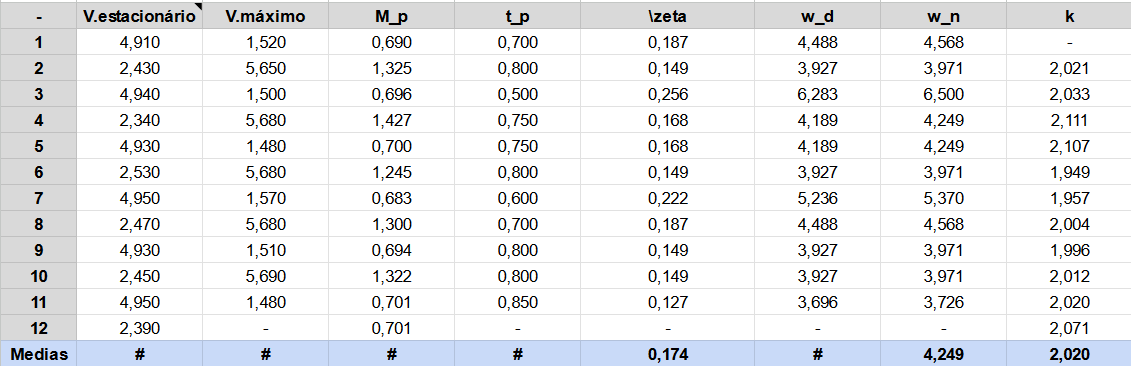

considerando a tabela acima, obtemos

$$
\zeta = 0.174 \\
\omega_n = 4.249 \\
$$

O que nos dá a seguinte função transferência:

$$
G(s) = \frac{17.997}{s^2 + 1.491s + 18.073}
$$

O que faremos agora, é gerar simulações de resposta ao degrau via biblioteca Control do python. Depois disso, pegaremos os valores reais do arquivo 'a5.csv' e produziremos o sinal equivalente de resposta ao degrau. Por fim, faremos uma comparação desses dois sinais.

# <font color='green' style='font-size: 30px;'> Resposta ao degrau da função transferência obtida dos cálculos da tabela
 </font> <hr style='border: 2px solid green
;'>

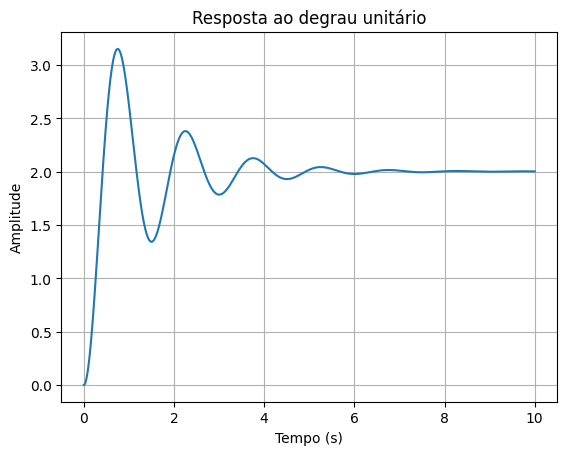

                  Valor
Parâmetro              
RiseTime           0.30
SettlingTime       5.32
SettlingMin        1.35
SettlingMax        3.15
Overshoot         57.24
Undershoot         0.00
Peak               3.15
PeakTime           0.77
SteadyStateValue   2.00


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control

zeta = 0.174
wn = 4.249
k = 2.002

num = [k*wn**2]
den = [1, 2*zeta*wn, wn**2]
G = control.tf(num, den)

t = np.linspace(0, 10, 1000)
y_simulado, t_simulado = control.step_response(G,t)


plt.plot(y_simulado,t_simulado)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta ao degrau unitário')
plt.grid()
plt.show()


# Obter informações de desempenho
info = control.step_info(G)

# Criar um DataFrame a partir do dicionário com as informações de desempenho
df_simulacao = pd.DataFrame.from_dict(info, orient='index', columns=['Valor'])
df_simulacao.index.name = 'Parâmetro'

# Formatar os valores como números com duas casas decimais
df_simulacao_formatada = df_simulacao.applymap(lambda x: f'{x:.2f}')

print(df_simulacao_formatada)


# <font color='green' style='font-size: 30px;'> Gerando sinal a partir dos dados de a5 (gerados experimentalmente)
 </font> <hr style='border: 2px solid green
;'>

In [66]:
import pandas as pd
import numpy as np

# Carrega os dados do arquivo CSV para um DataFrame
df_real = pd.read_csv('a5.csv', sep=';', header=None, decimal=',')

# Criando as listas vazias para armazenar os arrays
tempo_list = []
saida_list = []

# Variáveis para guardar os valores temporários
tempo = []
saida = []

# Variável para armazenar o último valor da terceira coluna
last_val = df_real.iloc[0, 2]

# Loop pelas linhas do DataFrame
for i, row in df_real.iterrows():
    # Verifica se o valor da terceira coluna mudou
    if row[2] != last_val:
        # Adiciona os arrays de tempo e saída nas respectivas listas
        tempo_list.append(np.array(tempo))
        saida_list.append(np.array(saida))
        # Reseta as variáveis de tempo e saída
        tempo = []
        saida = []
        # Atualiza o valor da terceira coluna
        last_val = row[2]
    # Adiciona os valores de tempo e saída aos arrays temporários
    tempo.append(row[0])
    saida.append(row[1])

# Adiciona os últimos arrays de tempo e saída às listas
tempo_list.append(np.array(tempo))
saida_list.append(np.array(saida))


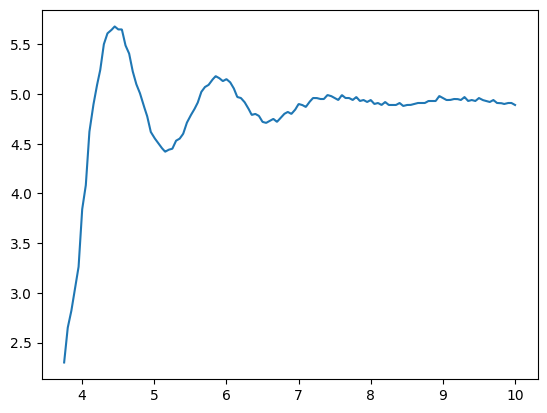

In [67]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


# Cria uma função interpoladora
f = interp1d(tempo_list[1], saida_list[1])

# Encontra o valor mínimo de x
x_min = np.min(tempo_list[1])

# Cria um novo conjunto de pontos com maior resolução
t_real = np.linspace(x_min, 10, 1000)
y_real = f(t_real)

# Plota o gráfico com a curva interpolada
plt.plot(t_real, y_real)
plt.show()


# <font color='green' style='font-size: 30px;'> Comparando os dois sinais
 </font> <hr style='border: 2px solid green
;'>

Após somar-mos 3.7 aos valores do vetor saída e 4 ao vetor tempo da simulação, podemos ver que ambas as curvas obtidas são bastante similares. Isso nos dá bastante confidência sobre a função transferência obtida.

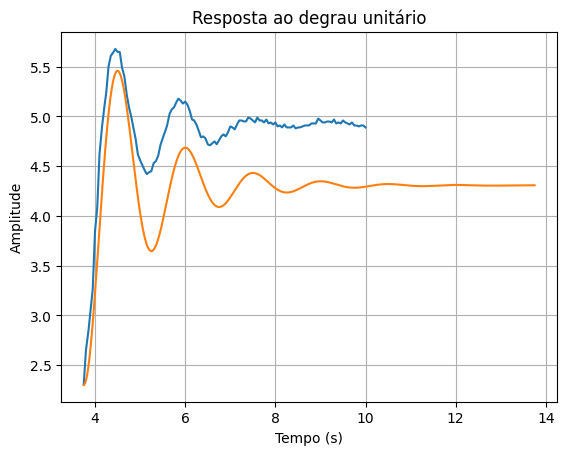

In [70]:
import matplotlib.pyplot as plt


# Plota os resultados:
plt.plot(t_real, y_real, label='Experimental')

# aqui, devemos fazer eles partirem do mesmo ponto (condição inicial igual)
plt.plot(y_simulado+t_real[0],t_simulado+y_real[0], label='Simulação')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta ao degrau unitário')
plt.grid()
plt.show()
